**Fake News Detection**

Mihir Joshi 191310132054

Shivam Bhuva 191310132030


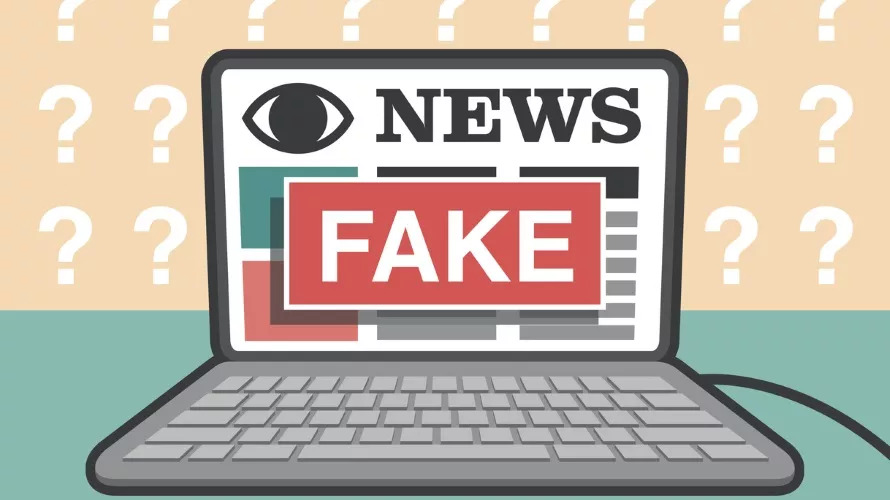

In [1]:
from IPython.display import Image
Image('/content/drive/MyDrive/Colab Notebooks/Fake_news/FakeNews.jpg', width=700, height=500)

In [2]:
#importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

In [3]:
# Inserting fake and real dataset
df_fake = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Fake_news/Fake.csv")
df_true = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Fake_news/True.csv")

In [4]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [6]:
df_fake["class"] = 0
df_true["class"] = 1

In [7]:
df_fake.shape, df_true.shape

((23481, 5), (21417, 5))

In [8]:
df_fake_manual_testing = df_fake.tail(10)
for i in range(23480,23470,-1):
    df_fake.drop([i], axis = 0, inplace = True)
df_true_manual_testing = df_true.tail(10)
for i in range(21416,21406,-1):
    df_true.drop([i], axis = 0, inplace = True)

In [9]:
df_fake.shape, df_true.shape

((23471, 5), (21407, 5))

In [10]:
# saving for manual testing
df_fake_manual_testing["class"] = 0
df_true_manual_testing["class"] = 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
df_fake_manual_testing

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [12]:
df_true_manual_testing

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [13]:
df_manual_testing = pd.concat([df_fake_manual_testing,df_true_manual_testing], axis = 0)
df_manual_testing.to_csv("/content/drive/MyDrive/Colab Notebooks/Fake_news/manual_testing.csv")

In [14]:
# Merge Fake and True
df_marge = pd.concat([df_fake, df_true], axis =0 )
df_marge.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [15]:
# droping 'title' 'subject' 'date'
df = df_marge.drop(["title", "subject","date"], axis = 1)
df.isnull().sum()

text     0
class    0
dtype: int64

In [16]:
# suffle the data
df = df.sample(frac = 1)

In [17]:
df.head()


,text,class
10436,DNC staffer Seth Rich was shot in the back sev...,0
18730,The woman who wants to be the next Democrat ca...,0
10884,WASHINGTON (Reuters) - New Jersey Governor Chr...,1
17185,Of course they have no plans to assimilate The...,0
19080,Watch Joy Behar as she hilariously attempts to...,0


In [18]:
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)

In [19]:
df.columns , df.head()

(Index(['text', 'class'], dtype='object'),
                                                 text  class
 0  DNC staffer Seth Rich was shot in the back sev...      0
 1  The woman who wants to be the next Democrat ca...      0
 2  WASHINGTON (Reuters) - New Jersey Governor Chr...      1
 3  Of course they have no plans to assimilate The...      0
 4  Watch Joy Behar as she hilariously attempts to...      0)

In [20]:
# convert the text in lowercase, remove the extra space, special chracter , ulr & links
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text
df["text"] = df["text"].apply(wordopt)

In [21]:
# Define dependent and independent variable as x and y
x = df["text"]
y = df["class"]

In [22]:
#spliting data set for training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [23]:
# text to vectors
from sklearn.feature_extraction.text import TfidfVectorizer
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [24]:
# 4 types of data training
# (1)Logistic Regression  (2)Decision Tree Classification (3)Gradient Boosting Classifier (4)Random Forest Classifier

# (1) Logistic Regression
%%time
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(xv_train,y_train)
pred_lr=LR.predict(xv_test)
score = LR.score(xv_test, y_test)
print(f"Accuracy : {round(score*100,2)}%")
print(classification_report(y_test, pred_lr))

Accuracy : 98.81%
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5809
           1       0.99      0.99      0.99      5411

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220

CPU times: user 3.39 s, sys: 3.63 s, total: 7.01 s
Wall time: 3.76 s


In [25]:
# (2) Decision Tree Classification
%%time
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)
pred_dt = DT.predict(xv_test)
score = DT.score(xv_test, y_test)
print(f"Accuracy : {round(score*100,2)}%")
print(classification_report(y_test, pred_dt))

Accuracy : 99.65%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5809
           1       1.00      1.00      1.00      5411

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220

CPU times: user 38.9 s, sys: 58.8 ms, total: 38.9 s
Wall time: 38.8 s


In [26]:
# (3) Gradient Boosting Classifier
%%time
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(xv_train, y_train)
pred_gbc = GBC.predict(xv_test)
score = GBC.score(xv_test, y_test)
print(f"Accuracy : {round(score*100,2)}%")
print(classification_report(y_test, pred_gbc))

Accuracy : 99.58%
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5809
           1       0.99      1.00      1.00      5411

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220

CPU times: user 4min 47s, sys: 321 ms, total: 4min 47s
Wall time: 4min 46s


In [27]:
# (4)Random Forest Classifier
%%time
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)
pred_rfc = RFC.predict(xv_test)
score = RFC.score(xv_test, y_test)
print(f"Accuracy : {round(score*100,2)}%")
print(classification_report(y_test, pred_rfc))

Accuracy : 98.83%
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5809
           1       0.99      0.99      0.99      5411

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220

CPU times: user 1min 20s, sys: 95.1 ms, total: 1min 20s
Wall time: 1min 19s


In [28]:
#manual testing
def output_lable(n):
    if n == 0:
        return "News is FAKE..."
    elif n == 1:
        return "News is TRUE..."
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GBC = GBC.predict(new_xv_test)
    pred_RFC = RFC.predict(new_xv_test)

    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {}".format(output_lable(pred_LR[0]), 
                                                                                                              output_lable(pred_DT[0]), 
                                                                                                              output_lable(pred_GBC[0]), 
                                                                                                              output_lable(pred_RFC[0])))

In [31]:
news = str(input())
manual_testing(news)

GENEVA (Reuters) - North Korea and the United States clashed at a U.N. forum on Tuesday over their military intentions towards one another, with Pyongyang s envoy declaring it would  never  put its nuclear deterrent on the negotiating table. Japan, well within reach of North Korea s missiles, said the world must maintain pressure on the reclusive country to rein in its nuclear and missile programs and now was not the time for a resumption of multi-party talks. North Korea has pursued its weapons programs in defiance of U.N. Security Council sanctions and ignored all calls, including from major ally China, to stop, prompting a bellicose exchange of rhetoric between the North and the United States. North Korea justifies its weapons programs, including its recent threat to fire missiles towards the U.S. Pacific territory of Guam, by pointing to perceived U.S. hostility, such as military exercises with South Korea this week. U.S. disarmament ambassador Robert Wood told a U.N.-sponsored Con